In [ ]:
!pip install opencv-python numpy scipy diffusers transformers

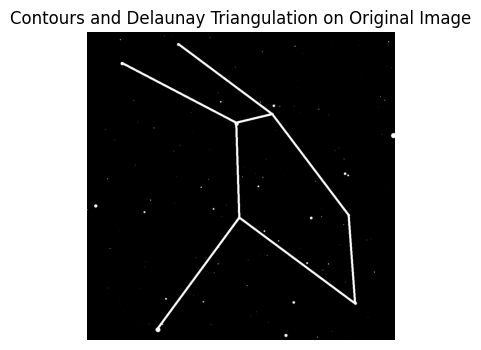

In [ ]:
import cv2
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

# Load the original image
input_image = cv2.imread('/content/img.png')

# Convert the image to grayscale
gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply threshold to get binary image
_, thresh = cv2.threshold(blurred, 254, 255, cv2.THRESH_BINARY)

# Find contours of the bright regions
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours directly on the original image
cv2.drawContours(input_image, contours, -1, (255, 255, 255), 5)

# Extract the star points from contours (for Delaunay triangulation)
stars = np.array([contour[0][0] for contour in contours])

# Perform Delaunay triangulation if there are at least 3 points
if len(stars) >= 3:
    tri = Delaunay(stars)
    lines = stars[tri.simplices]

    # Draw Delaunay triangulation lines on the same image
    for line in lines:
        pt1 = tuple(map(int, line[0]))
        pt2 = tuple(map(int, line[1]))
        cv2.line(input_image, pt1, pt2, (255, 255, 255), 5)

# Save the modified image with both contours and triangulation as "output_1.png"
cv2.imwrite('output_1.png', input_image)

# Convert the final image from BGR to RGB for displaying
image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the combined image
plt.figure(figsize=(4, 4))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis for cleaner view
plt.title("Contours and Delaunay Triangulation on Original Image")
plt.show()


In [ ]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16, use_safetensors=True
).to("cuda")
# pipeline.enable_model_cpu_offload()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

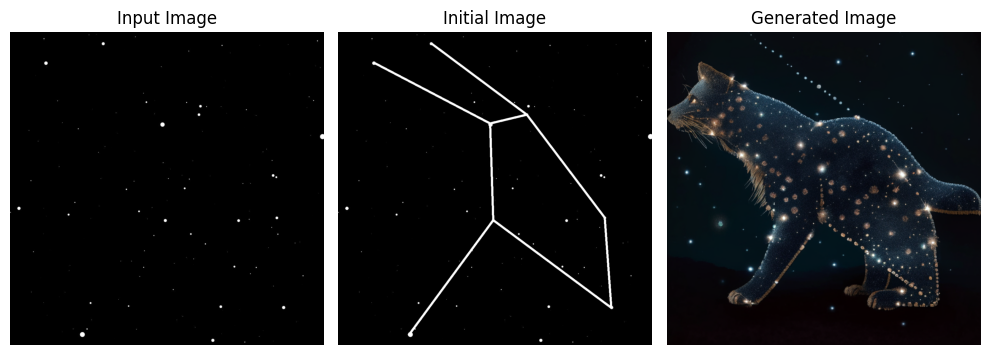

In [ ]:
import matplotlib.pyplot as plt

url = "/content/output_1.png"
init_image = load_image(url)

prompt = "an animal made from stars"

# Increase the number of inference steps
image = pipeline(prompt, image=init_image, num_inference_steps=500).images[0]

# Save the generated image
image.save("/content/output.png")

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(10, 5))  # Adjust figsize for larger images

input_image = cv2.imread('/content/img.png')

# Display the input image on the first subplot
axes[0].imshow(input_image)
axes[0].axis("off")  # Hide axis for cleaner view
axes[0].set_title("Input Image")

# Display the initial image on the second subplot
axes[1].imshow(init_image)
axes[1].axis("off")  # Hide axis for cleaner view
axes[1].set_title("Initial Image")

# Display the generated image on the third subplot
axes[2].imshow(image)
axes[2].axis("off")  # Hide axis for cleaner view
axes[2].set_title("Generated Image")

# Show the figure with both images
plt.tight_layout()
plt.show()